### <center> Hypothesis_Test !!! </center>
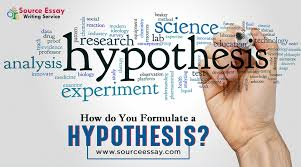

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from pandas import ExcelWriter
from pandas import ExcelFile
df = pd.read_csv('/home/shri/Documents/projects/Hypothesis/data.csv')
df.head(2)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary
0,Sweetwater,Alex,51,Male,United States,White,8/15/2011,Software Engineering,Software Engineering Manager,"$56,160.00"
1,Carabbio,Judith,30,Female,United States,White,11/11/2013,Software Engineering,Software Engineer,"$116,480.00"


In [23]:
df.shape

(112, 10)

# Hypothesis Test

#### State The Hypothesis

Average salary gain by the male and female engg are equal.

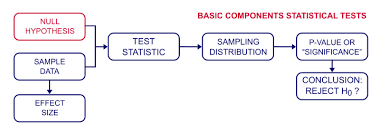

- H0: Average Salary is equal. (Null Hypothesis)
- H1: Average Salary for male is different no females. (Alternative Hypothesis) 
    - Significant level : 0.05

#### Step 1: Structure the dataset

In [35]:
import re
x = []
for i in df["Salary"]:
    y=i.replace('$', '')
    y=y.replace(',', '')
    y=int(float(y))
    x.append(y)
print(len(x))

112


In [36]:
df["salary"] = x

In [37]:
male= df[df["Gender"] == "Male"]
print("- Shape for male",male.shape)
female= df[df["Gender"] == "Female"]
print("- shape for female",female.shape)

- Shape for male (50, 11)
- shape for female (62, 11)


In [38]:
male.head(10)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,salary
0,Sweetwater,Alex,51,Male,United States,White,8/15/2011,Software Engineering,Software Engineering Manager,"$56,160.00",56160
3,Szabo,Andrew,34,Male,United States,White,7/7/2014,Software Engineering,Software Engineer,"$99,840.00",99840
8,Jeremy,Peter,43,Male,United States,White,5/12/2014,Sales,Area Sales Manager,"$116,480.00",116480
9,Gonzales,Ricardo,63,Male,United States,White,5/12/2014,Sales,Area Sales Manager,"$115,440.00",115440
10,Buck,Edward,42,Male,United States,White,9/29/2014,Sales,Area Sales Manager,"$114,400.00",114400
15,Khemmich,Bartholemew,38,Male,United States,White,8/19/2013,Sales,Area Sales Manager,"$114,400.00",114400
16,Ozark,Travis,35,Male,United States,White,1/5/2015,Sales,Area Sales Manager,"$114,400.00",114400
17,Riordan,Michael,50,Male,United States,White,1/9/2006,Sales,Area Sales Manager,"$114,400.00",114400
18,Sahoo,Adil,31,Male,United States,White,8/30/2010,Production,Production Technician II,"$60,320.00",60320
20,Monkfish,Erasumus,25,Male,United States,White,11/7/2011,Production,Production Technician II,"$56,160.00",56160


In [39]:
female.head(10)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,salary
1,Carabbio,Judith,30,Female,United States,White,11/11/2013,Software Engineering,Software Engineer,"$116,480.00",116480
2,Saada,Adell,31,Female,United States,White,11/5/2012,Software Engineering,Software Engineer,"$102,440.00",102440
4,Andreola,Colby,38,Female,United States,White,11/10/2014,Software Engineering,Software Engineer,"$99,008.00",99008
5,Daneault,Lynn,27,Female,United States,White,5/5/2014,Sales,Sales Manager,"$112,320.00",112320
6,Houlihan,Debra,51,Female,United States,White,5/5/2014,Sales,Director of Sales,"$124,800.00",124800
7,Onque,Jasmine,27,Female,United States,White,9/30/2013,Sales,Area Sales Manager,"$118,560.00",118560
11,Carter,Michelle,54,Female,United States,White,8/18/2014,Sales,Area Sales Manager,"$114,400.00",114400
12,Costa,Latia,29,Female,United States,White,1/10/2011,Sales,Area Sales Manager,"$114,400.00",114400
13,Dietrich,Jenna,30,Female,United States,White,2/20/2012,Sales,Area Sales Manager,"$114,400.00",114400
14,Givens,Myriam,28,Female,United States,White,2/16/2015,Sales,Area Sales Manager,"$114,400.00",114400


#### Step 2: Calculate statsistical dataset

In [40]:
print("- Mean Male salary is {}".format(male.salary.mean()))
print("- Mean female salary is {}".format(female.salary.mean()))

- Mean Male salary is 70469.98
- Mean female salary is 64785.27419354839


In [41]:
D_salary = male.salary.mean() - female.salary.mean()
print("Difference between male and female salary is {}".format(D_salary))

Difference between male and female salary is 5684.7058064516095


### For sample data
    > As stastitical data states that male salary and female salary is not same. 
    > Average male salary is greater than female salary i.e 5684.70 

#### Test
     Check P(x=5684|Ho) 

#### Step 3: Test 

In [42]:
import statsmodels.api as sm
sm.stats.ztest(male["salary"].dropna(), female["salary"].dropna(),alternative='two-sided')

(0.8861987181655508, 0.37551045427638696)

- Since the p-value (0.37551045427638696) is considerable, we can not reject the Null hypothesis that the mean salary of males is the same as that of females.

## Salary for men and women is us is same